In [342]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pylab as plt

import stretchablecorr as sc

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [343]:
from skimage.transform.pyramids import pyramid_reduce

In [511]:
cube, image_names = sc.load_image_sequence('./images/HS2_01/')
cube = cube[20:-1]
#cube = cube[0:3]
print(cube.shape)

Load images from ./images/HS2_01/...
Image sequence:
 24 frames , 1392*1024 pixels , memory size: 261 Mo
 images: 00p000001.TIF, 00p100012.TIF, 00p200023.TIF , ... ,  60p000278.TIF
(3, 1024, 1392)


In [512]:
#points = np.array([[1100, 200], [600, 400]])

grid_spacing = 40
grid_margin = 150
# ----
grid = sc.build_grid(cube.shape[1:], margin=grid_margin, spacing=grid_spacing)
points = np.stack( (grid[0].flatten(), grid[1].flatten()), axis=-1 )

grid size: 28x19
 i.e. 532 points


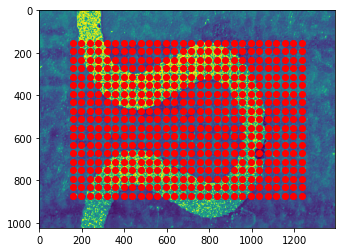

In [513]:
plt.imshow(cube[0]);
plt.plot(points[:, 0], points[:, 1], 'or');

In [514]:
downscale = 3
params = {'window_half_size': 23,
          'coarse_search': False,
          'phase':True,
          'method':'opti',
          'no_optim':False}

cube_reduced = [pyramid_reduce(I, downscale=downscale) for I in cube]
points_reduced = points/downscale

print(params['window_half_size']*downscale)
displ_coarse, err = sc.track_displ_img_to_img(cube_reduced, points_reduced, **params)
displ_coarse = displ_coarse*downscale

print('max displ:', np.sqrt(np.sum(displ_coarse**2, axis=-1)).max())

69
Compute image-to-image Lagrangian displacement field:
done                               
max displ: 22.081667158543706


In [525]:
params = {'window_half_size': 15,
          'coarse_search': False,
          'phase':False,
          'method':'opti',
          'no_optim':False}
displ, gaps, err1, err2 = sc.track_displ_2steps(cube, points,
                                    offsets=displ_coarse,
                                    **params)

Compute image-to-image Lagrangian displacement field:
done                               
Compute image-to-image Lagrangian displacement field:
done                               
Compute image-to-image Lagrangian displacement field:
done                               


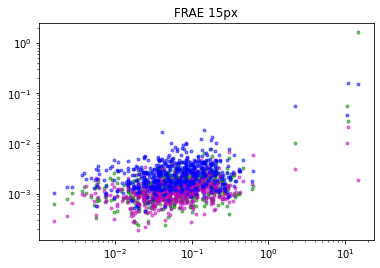

In [526]:
plt.title('FRAE ' + f"{params['window_half_size']}px");
plt.loglog(gaps.flatten(), err1[0, :, 1], '.g', alpha=0.5);
plt.loglog(gaps.flatten(), err1[1, :, 1], '.m', alpha=0.5);
plt.loglog(gaps.flatten(), err2[0, :, 1], '.b', alpha=0.5);

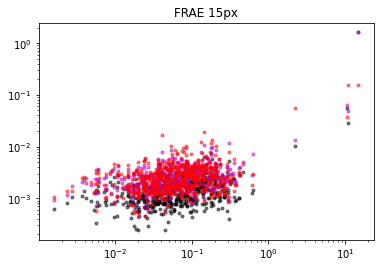

In [527]:
plt.title('FRAE ' + f"{params['window_half_size']}px");
plt.loglog(gaps.flatten(), err1[0, :, 1], '.k', alpha=0.5);
plt.loglog(gaps.flatten(), err1[1, :, 1]+err1[0, :, 1], '.m', alpha=0.5);
plt.loglog(gaps.flatten(), err2[0, :, 1], '.r', alpha=0.5);

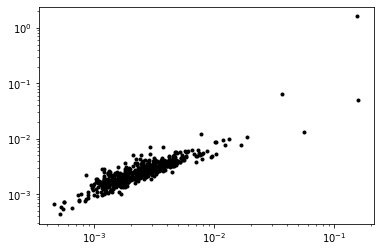

In [531]:
plt.loglog(err2[0, :, 1], err1[1, :, 1]+err1[0, :, 1], '.k')

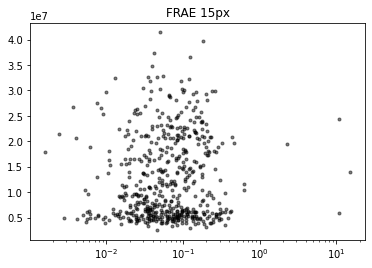

In [529]:
plt.title('FRAE ' + f"{params['window_half_size']}px");
plt.semilogx(gaps.flatten(), err[0, :, 1], '.k', alpha=0.5);
#plt.semilogx(gaps.flatten(), err[1, :, 1], '.k', alpha=0.5);

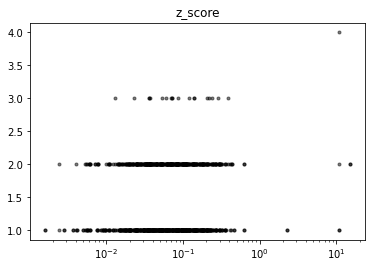

In [523]:
plt.title('z_score');
plt.semilogx(gaps.flatten(), err[0, :, 0], '.k', alpha=0.5);
plt.semilogx(gaps.flatten(), err[1, :, 0], '.k', alpha=0.5);

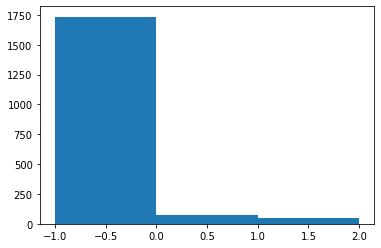

In [377]:
plt.hist(np.log10(gaps.flatten()), bins=[-1, 0, 1, 2]);

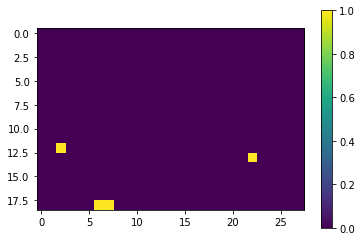

In [524]:
plt.imshow(np.log10(gaps.reshape(grid[0].shape))>0);
plt.colorbar();

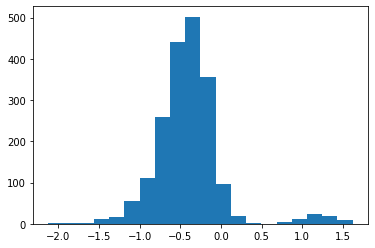

In [370]:
plt.hist(np.log10(gaps.flatten()), bins=20);

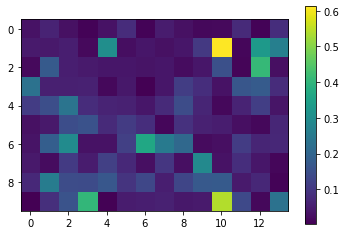

In [419]:
plt.imshow(gaps.reshape(grid[0].shape));
plt.colorbar();

In [362]:
argsorted = np.argsort(gaps[0].flatten())

pts = argsorted[-1]
print(pts, points[pts], gaps[0][pts])

1741 [426 802] 41.80144662362687


In [365]:
params = {'window_half_size': 40,
          'coarse_search': True,
          'phase':False,
          'method':'opti',
          'no_optim':False}
displ_2, gaps_2 = sc.track_displ_2steps(cube, points,
                                        offsets=None,
                                        **params)

Compute image-to-image Lagrangian displacement field:
done                               
Compute image-to-image Lagrangian displacement field:
done                               
Compute image-to-image Lagrangian displacement field:
done                               


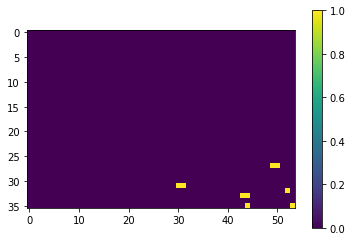

In [372]:
plt.imshow(np.log10(gaps_2).reshape(grid[0].shape)>1);
plt.colorbar();

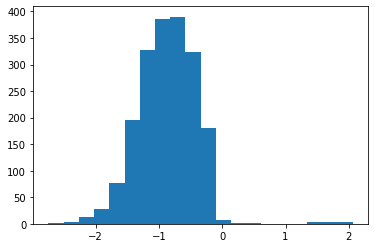

In [369]:
plt.hist(np.log10(gaps_2.flatten()), bins=20);

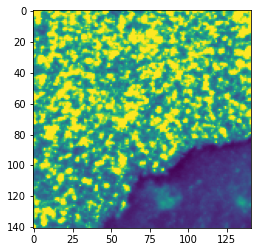

In [337]:
A0, ij = scgaps_2(I, points[pts], 70)
plt.imshow(A0)

In [381]:
downscale = 5

params = {'window_half_size': 16,
          'coarse_search': False,
          'phase':True,
          'method':'opti',
          'no_optim':False}

cube_reduced = [pyramid_reduce(I, downscale=downscale) for I in cube]
points_reduced = points/downscale

print(params['window_half_size']*downscale)
displ_coarse, err = sc.track_displ_img_to_img(cube_reduced, points_reduced, **params)
displ_coarse = displ_coarse*downscale

print('max displ:', np.sqrt(np.sum(displ_coarse**2, axis=-1)).max())

80
Compute image-to-image Lagrangian displacement field:
done                               
max displ: 22.16562263391049


In [380]:
downscale = 2

params = {'window_half_size': 20,
          'coarse_search': False,
          'phase':True,
          'method':'opti',
          'no_optim':False}

cube_reduced = [pyramid_reduce(I, downscale=downscale) for I in cube]
points_reduced = points/downscale

print(params['window_half_size']*downscale)
displ_coarse, err = sc.track_displ_img_to_img(cube_reduced, points_reduced,
                                              offsets=displ_coarse,
                                              **params)
displ_coarse = displ_coarse*downscale

print('max displ:', np.sqrt(np.sum(displ_coarse**2, axis=-1)).max())

16
Compute image-to-image Lagrangian displacement field:
done                               
max displ: 67.13687469402244


In [382]:
params = {'window_half_size': 20,
          'coarse_search': True,
          'phase':False,
          'method':'opti',
          'no_optim':False}
displ_3, gaps_3 = sc.track_displ_2steps(cube, points,
                                        offsets=None,
                                        **params)

Compute image-to-image Lagrangian displacement field:
done                               
Compute image-to-image Lagrangian displacement field:
done                               
Compute image-to-image Lagrangian displacement field:
done                               


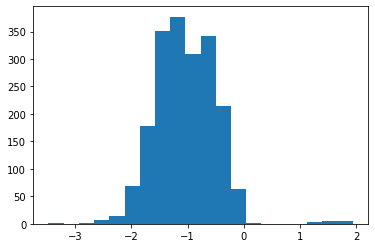

In [383]:
plt.hist(np.log10(gaps_3.flatten()), bins=20);

[-1.53660169 14.3411673 ]
[-1.9853045  15.81618823]
[-3.44842285 30.82120699]
triangle_error 0.6679061056934684
triangle_error 0.6679061056934408


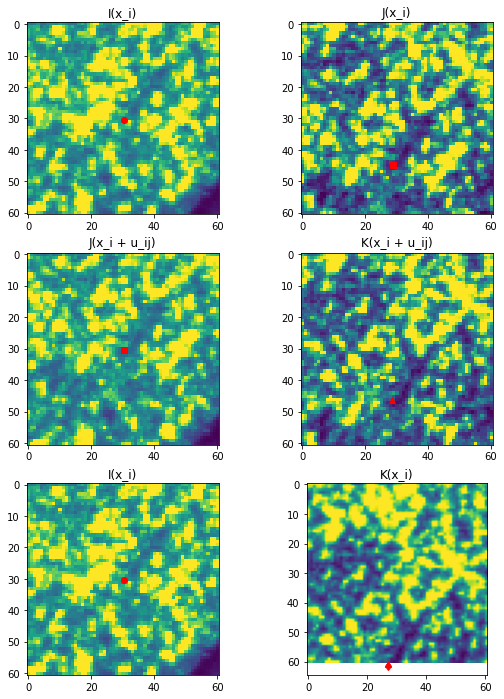

In [334]:
IJK = cube

window_half_size = 30
params = {'window_half_size': window_half_size,
          'coarse_search': False,
          'phase':True,
          'method':'opti' }

I, J, K = IJK
xy_i = points[pts]

u_ij, err_ij = sc.get_shifts(I, J, *xy_i, **params)
print(u_ij)

xy_j = xy_i + u_ij
u_jk, err_jk = sc.get_shifts(J, K, *xy_j, **params)
x_ijk = xy_j + u_jk
print(u_jk)

u_ik, err_ik = sc.get_shifts(I, K, *xy_i, offset=u_ij+u_jk, **params)
x_ik = xy_i + u_ik
C, ij = sc.crop(K, xy_i, window_half_size)
print(u_ik)


fig, axes = plt.subplots(3, 2, figsize=(9,12))

A0, ij = sc.crop(I, xy_i, window_half_size)
B0, ij = sc.crop(J, xy_i, window_half_size)
C0, ij = sc.crop(K, xy_i, window_half_size)

a0 = np.array(A0.shape)/2
b0 = a0 + u_ij[::-1]
c0 = a0 + u_jk[::-1]
c1 = a0 + u_ik[::-1]
c2 = a0 + u_ij[::-1] + u_jk[::-1]

ax1 = axes[0, 0]
ax1.imshow(A0); ax1.plot(*a0[::-1], 'or'); ax1.set_title('I(x_i)');

ax2 = axes[0, 1]
ax2.imshow(B0); ax2.plot(*b0[::-1], 'sr'); ax2.set_title('J(x_i)');

B1, ij = sc.crop(J, xy_j, window_half_size)
C1, ij = sc.crop(K, xy_j, window_half_size)
ax3 = axes[1, 0]
ax3.imshow(B1); ax3.plot(*a0[::-1], 'sr'); ax3.set_title('J(x_i + u_ij)');

ax4 = axes[1, 1]
ax4.imshow(C1); ax4.plot(*c0[::-1], '^r'); ax4.set_title('K(x_i + u_ij)');

ax5 = axes[2, 0]
ax5.imshow(A0); ax5.plot(*a0[::-1], 'or'); ax5.set_title('I(x_i)');

ax6 = axes[2, 1]
ax6.imshow(C0); ax6.plot(*c1[::-1], 'dr'); ax6.set_title('K(x_i)');
ax6.plot(*c2[::-1], '^r');

print('triangle_error', np.sqrt(np.sum((x_ik - x_ijk)**2)))
print('triangle_error', np.sqrt(np.sum((u_ij + u_jk - u_ik)**2)))

In [241]:
displ_to_ref_coarse = sc.integrate_displacement(displ_coarse)
displ_to_ref =  sc.integrate_displacement(displ)

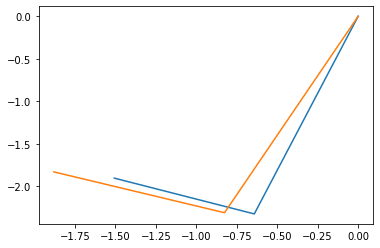

In [242]:
plt.plot(displ_to_ref_coarse[:, 0, 0], displ_to_ref_coarse[:, 0, 1])
plt.plot(displ_to_ref[:, 0, 0], displ_to_ref[:, 0, 1])

In [100]:
ij = 19, 21
I, J = [cube[idx] for idx in ij]

downscale = 2
window_half_size = 80


I, J = [pyramid_reduce(u, downscale=downscale) for u in [I, J]]

xy_i = points[0]/downscale


params = {'window_half_size': window_half_size,
          'coarse_search': False,
          'phase':True,
          'method':'opti' }


A0, ij = sc.crop(I, xy_i, window_half_size)
B0, ij = sc.crop(J, xy_i, window_half_size)

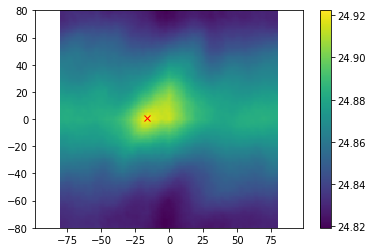

In [101]:
dx_span, dy_span, cross_corr, res = sc.output_cross_correlation(A0, B0,
                                                                upsamplefactor=1, phase=False)

argmax_idx = np.unravel_index(np.argmax(cross_corr), cross_corr.shape)
argmax = dy_span[argmax_idx[0]], dx_span[argmax_idx[1]]
argmax_idx_cc = argmax_idx 
plt.pcolor(dx_span, dy_span, np.log(cross_corr))
plt.plot(*argmax[::-1], 'xr'); plt.colorbar();
plt.axis('equal');

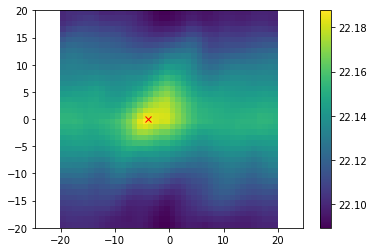

In [99]:
dx_span, dy_span, cross_corr, res = sc.output_cross_correlation(A0, B0,
                                                                upsamplefactor=1, phase=False)

argmax_idx = np.unravel_index(np.argmax(cross_corr), cross_corr.shape)
argmax = dy_span[argmax_idx[0]], dx_span[argmax_idx[1]]
argmax_idx_cc = argmax_idx 
plt.pcolor(dx_span, dy_span, np.log(cross_corr))
plt.plot(*argmax[::-1], 'xr'); plt.colorbar();
plt.axis('equal');

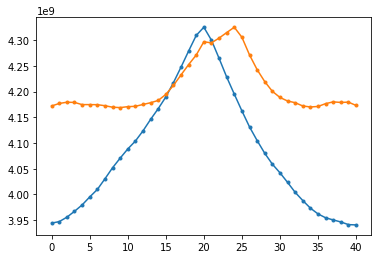

In [98]:
plt.plot(cross_corr[:, argmax_idx[1]], '.-')
plt.plot(cross_corr[argmax_idx[0], :], '.-')